In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

from functions import *

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

See Tutorial week3 for exponential RG

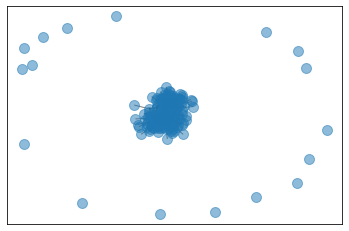

In [2]:
vilHH_adj_all = pd.read_csv(
    'banerjee12_data/datav4.0/Data/1. Network Data/Adjacency Matrices/adj_allVillageRelationships_HH_vilno_2.csv',
    header = None)

G = nx.from_pandas_adjacency(vilHH_adj_all) #interaction between the households
nx.draw_networkx(G, with_labels = False, alpha = 0.5, node_size = 100)

In [8]:
np.mean(list(dict(G.degree).values()))

6.912820512820513

In [3]:
## microfinance was only spread to  43 of the 77 villages. which 43?
cross_sec = pd.read_stata("banerjee12_data/datav4.0/Stata Replication/data/cross_sectional.dta")
villages = [str(int(vil)) for vil in cross_sec['village']]
print(villages)
cross_sec.head(5)

['1', '2', '3', '4', '6', '9', '12', '15', '19', '20', '21', '23', '24', '25', '29', '31', '32', '33', '36', '39', '42', '43', '45', '46', '47', '48', '50', '51', '52', '55', '57', '59', '60', '62', '64', '65', '67', '68', '70', '71', '72', '73', '75']


,village,mf,degree_leader,eigenvector_centrality_leader,between_centrality_leader,bonacich_centrality_leader,decay_centrality_leader,diffusion_centrality_leader,closeness_centrality_leader,communication_centrality_leader,numHH,fractionLeaders,savings,shgparticipate,fracGM_survey
0,1.0,0.214290,21.111,0.088717,0.039078,4.5436,5.8691,7.9435,0.46820,0.150740,182,0.153850,1.773399,0.103448,2.768473
1,2.0,0.138730,15.727,0.078247,0.040030,4.3158,4.0554,8.1701,0.40426,0.102020,195,0.112820,1.837438,0.152709,2.852217
2,3.0,0.140080,16.636,0.064052,0.019945,4.3200,6.2296,4.1728,0.41529,0.019396,292,0.119860,1.736232,0.243478,2.505814
3,4.0,0.067873,16.625,0.066191,0.032432,4.2553,4.5632,8.0490,0.39503,0.095877,239,0.075314,1.777344,0.218750,2.472803
4,6.0,0.239130,13.600,0.121900,0.043495,4.9279,3.5441,4.9059,0.46238,0.026162,114,0.192980,1.518182,0.336364,2.475248


In [6]:
#what is <z> OVER all villages?

zs = []

for vil in villages:
    
    path = 'banerjee12_data/datav4.0/Data/1. Network Data/Adjacency Matrices/adj_allVillageRelationships_HH_vilno_{}.csv'.format(vil)
    adj_mat = pd.read_csv(path,header = None)
    current_g = nx.from_pandas_adjacency(adj_mat)
    current_zavg = np.mean(list(dict(current_g.degree).values()))
    zs.append(current_zavg)
    print("village {}, avg_degree {}".format(vil, current_zavg))
    
print("avg degree over all 43 villages:", np.mean(zs))
    

village 1, avg_degree 9.538461538461538
village 2, avg_degree 6.912820512820513
village 3, avg_degree 8.863013698630137
village 4, avg_degree 7.807531380753138
village 6, avg_degree 6.4035087719298245
village 9, avg_degree 10.028985507246377
village 12, avg_degree 8.034285714285714
village 15, avg_degree 10.385964912280702
village 19, avg_degree 9.0
village 20, avg_degree 6.128205128205129
village 21, avg_degree 9.425742574257425
village 23, avg_degree 8.377952755905511
village 24, avg_degree 9.889570552147239
village 25, avg_degree 9.222222222222221
village 29, avg_degree 7.76551724137931
village 31, avg_degree 7.856209150326797
village 32, avg_degree 9.717842323651452
village 33, avg_degree 7.431372549019608
village 36, avg_degree 10.352941176470589
village 39, avg_degree 8.383275261324043
village 42, avg_degree 7.447916666666667
village 43, avg_degree 8.343434343434344
village 45, avg_degree 7.656108597285068
village 46, avg_degree 8.32824427480916
village 47, avg_degree 9.381294964

## Poisson RG

So, to fit a Poisson RG to represent all the villages, lets set $\langle z \rangle = 9.19$. 

Then, we can explore the sparse limit: as $N \rightarrow \infty$, set $q = \langle z \rangle/ (N-1)$), which then keeps $\langle z \rangle$ constant. how does correlation between seeding and the centrality measures change?

*a) what happens with increasing values of N?*

In POisson RGs, 
- clustering -> 0

so we might expect this to impact the correlations. 

In [46]:
#variability of degree
def sigmaMuD(G):
    '''returns sigma/mu of the degree sequence'''
    listD=[deg for deg in dict(G.degree()).values()]
    return np.std(listD)/np.average(listD)

In [47]:
z_avg = np.mean(zs)
N = list(np.linspace(50, 1000, 30, dtype = int))
q = [z_avg/(n-1) for n in N]

cs = []
for i in range(len(N)):
    Ger=nx.erdos_renyi_graph(N[i],q[i])
    c_net = nx.transitivity(Ger)
    print(N[i], f'{c_net:.4f}', sigmaMuD(Ger))

50 0.1688 0.3113207547169811
82 0.1150 0.2651718843136537
115 0.0833 0.2849931141548854
148 0.0682 0.30110345368239644
181 0.0491 0.3273291659233496
213 0.0435 0.3123352557067356
246 0.0433 0.30943642972673785
279 0.0346 0.3275114270128633
312 0.0308 0.3084925531456457
344 0.0281 0.3286562207339135
377 0.0266 0.3030797357324926
410 0.0209 0.3246625404325046
443 0.0225 0.31491033662323764
475 0.0211 0.32844617296211653
508 0.0175 0.32903829510148364
541 0.0153 0.31463883551296495
574 0.0158 0.3148969625698828
606 0.0147 0.3293941278347131
639 0.0147 0.322554735927782
672 0.0162 0.30452490620258676
705 0.0132 0.33537161037092883
737 0.0107 0.3353038905521267
770 0.0102 0.3294547966957064
803 0.0115 0.31902961855703604
836 0.0098 0.32590906211945814
868 0.0118 0.34491675170476616
901 0.0102 0.3132568496270641
934 0.0101 0.3125207681294353
967 0.0094 0.3370697182563744
1000 0.0084 0.32702394503197185


In [41]:
#run this before the loop
dat = pd.DataFrame({"Targeting Method": ["Friend","Pair","Random"]*5,
              "Measure": list(np.repeat(['Betweeness', "Degree",'Eigenvector','Katz',"Page Rank"],3))})

In [42]:
z_avg = np.mean(zs)

N = list(np.linspace(50, 1000, 20, dtype = int))
q = [z_avg/(n-1) for n in N] #q = p(edge) has to decrease to counteract N increasing, so that z stays constant

for i in range(len(N)):
    
    Ger=nx.erdos_renyi_graph(N[i],q[i])

    probs, centralities = get_prob_centralities(Ger, n_samples = 300, p = 0.2)
    res = get_spearman(probs, centralities)

    dat[str(N[i])] = res['SCorrelation']#append the column to current dat
        
    print(N[i])
    print(res)

50
   Targeting Method      Measure  SCorrelation
0            Friend   Betweeness      0.895139
1              Pair   Betweeness      0.731731
2            Random   Betweeness     -0.018002
3            Friend       Degree      0.839006
4              Pair       Degree      0.730558
5            Random       Degree     -0.009903
6            Friend  Eigenvector      0.736670
7              Pair  Eigenvector      0.629808
8            Random  Eigenvector     -0.034126
9            Friend         Katz      0.733980
10             Pair         Katz      0.629327
11           Random         Katz     -0.036148
12           Friend    Page Rank      0.855414
13             Pair    Page Rank      0.743510
14           Random    Page Rank      0.001781
100
   Targeting Method      Measure  SCorrelation
0            Friend   Betweeness      0.865173
1              Pair   Betweeness      0.735005
2            Random   Betweeness      0.020891
3            Friend       Degree      0.843582
4     

600
   Targeting Method      Measure  SCorrelation
0            Friend   Betweeness      0.888033
1              Pair   Betweeness      0.733484
2            Random   Betweeness      0.042721
3            Friend       Degree      0.892845
4              Pair       Degree      0.736828
5            Random       Degree      0.051669
6            Friend  Eigenvector      0.782234
7              Pair  Eigenvector      0.662764
8            Random  Eigenvector      0.046033
9            Friend         Katz      0.775473
10             Pair         Katz      0.658406
11           Random         Katz      0.045730
12           Friend    Page Rank      0.909668
13             Pair    Page Rank      0.748534
14           Random    Page Rank      0.051860
650
   Targeting Method      Measure  SCorrelation
0            Friend   Betweeness      0.897291
1              Pair   Betweeness      0.771446
2            Random   Betweeness     -0.009245
3            Friend       Degree      0.896789
4    

In [43]:
dat

,Targeting Method,Measure,50,100,150,200,250,300,350,400,...,550,600,650,700,750,800,850,900,950,1000
0,Friend,Betweeness,0.895139,0.865173,0.890673,0.900101,0.890445,0.915813,0.893112,0.891425,...,0.886510,0.888033,0.897291,0.866916,0.888100,0.878897,0.882655,0.900521,0.891210,0.883910
1,Pair,Betweeness,0.731731,0.735005,0.760213,0.753014,0.752374,0.769053,0.696532,0.751313,...,0.729196,0.733484,0.771446,0.699677,0.769658,0.757017,0.760404,0.762798,0.744287,0.769055
2,Random,Betweeness,-0.018002,0.020891,0.040461,0.087664,0.071746,-0.026324,-0.012740,0.052431,...,0.027253,0.042721,-0.009245,-0.024106,-0.021919,0.057381,0.069309,0.019257,-0.032029,-0.014183
3,Friend,Degree,0.839006,0.843582,0.868144,0.884812,0.892594,0.903240,0.886842,0.880842,...,0.887515,0.892845,0.896789,0.871019,0.888370,0.885083,0.884511,0.906137,0.892786,0.888052
4,Pair,Degree,0.730558,0.710994,0.745516,0.738157,0.753463,0.759296,0.685429,0.754928,...,0.727571,0.736828,0.775245,0.712490,0.766370,0.765362,0.760584,0.763050,0.747728,0.760845
5,Random,Degree,-0.009903,0.012768,0.056962,0.097283,0.067676,-0.017747,-0.035502,0.058096,...,0.019748,0.051669,-0.022660,-0.023556,-0.019610,0.047796,0.070870,0.022795,-0.033176,-0.021013
6,Friend,Eigenvector,0.736670,0.719251,0.744779,0.773310,0.778942,0.806110,0.755806,0.757493,...,0.753874,0.782234,0.768523,0.736988,0.783582,0.777058,0.766506,0.807019,0.775907,0.759387
7,Pair,Eigenvector,0.629808,0.588035,0.641163,0.655291,0.634864,0.668649,0.548786,0.663219,...,0.588986,0.662764,0.673056,0.603735,0.678763,0.671718,0.663704,0.684859,0.651249,0.664240
8,Random,Eigenvector,-0.034126,-0.039866,0.051907,0.113015,0.081944,-0.043532,-0.059676,0.074734,...,0.032821,0.046033,-0.019785,-0.027902,0.009331,0.060778,0.064894,0.020594,-0.017098,-0.009013
9,Friend,Katz,0.733980,0.718135,0.737514,0.771392,0.768495,0.803636,0.745377,0.756489,...,0.750614,0.775473,0.763456,0.727819,0.777923,0.775500,0.765975,0.798460,0.775011,0.754058


In [44]:
dat.to_csv("expRG.csv", index = False)
# do sourish's heatmap in R. 
#NOTE: changing N doesn't change correlation between seeding and centralities

Another direction: change $q$, (pick a large N) then benchmark ours against that.

## Small-world networks

*see Class Notes 5*. how to show that networks 
- are sparse
- have nonzero clustering
- distances that grow slowly, i.e. $<<d>> \sim lnN$

our 43 indian villages seem to fit the characteristics of small-world networks

further, they seem to be scale-free:
- $<z^2>/<z>$ that increase with N

In [74]:
N = np.array([])
z = np.array([])
sz = np.array([])
c = np.array([])
d = np.array([])

for vil in villages:
    path = 'banerjee12_data/datav4.0/Data/1. Network Data/Adjacency Matrices/adj_allVillageRelationships_HH_vilno_{}.csv'.format(vil)
    adj_mat = pd.read_csv(path,header = None)
    g = nx.from_pandas_adjacency(adj_mat)
    N = np.append(N, g.number_of_nodes())
    
    listD=[deg for deg in dict(g.degree()).values()]
    z = np.append(z,np.average(listD))
    sz = np.append(sz, np.std(listD))
    
    c = np.append(c,nx.transitivity(g))
    
    #avg shortest path length in largest CC
    largest_cc=max(nx.connected_components(g),key=len)
    Gcc=g.subgraph(largest_cc)
    d = np.append(d,nx.average_shortest_path_length(Gcc))
    


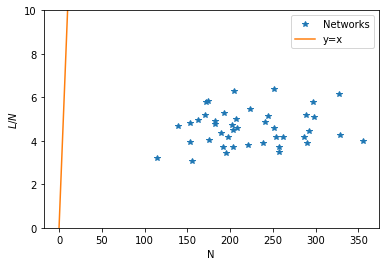

In [63]:
#Networks are sparse
L=N*z/2.0
y=L/(N)
x=np.arange(100)
#plt.xscale('log')
plt.ylim(0,10)
plt.plot(N,y,"*",label="Networks")
plt.plot(x,x,label="y=x")
plt.legend()
plt.xlabel("N")
plt.ylabel("$L/N$")
plt.show()

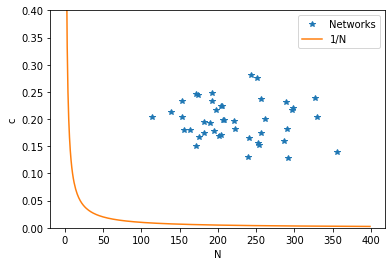

In [66]:
#Clustering is nonzero
x=np.arange(400)
plt.ylim(0,0.4)


plt.plot(N,c,"*",label="Networks")
plt.plot(x,1/x,label="1/N")
plt.legend()
plt.xlabel("N")
plt.ylabel("c")
plt.show()

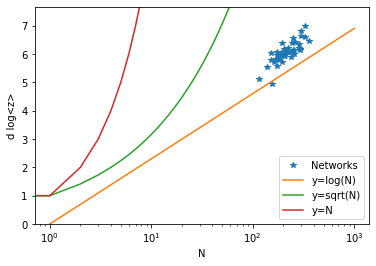

In [78]:
#distance grows slowly

y=np.log(z)*d
x=np.arange(1000)
plt.xscale('log')
plt.ylim(0,1.1*max(y))
plt.plot(N,y,"*",label="Networks")
plt.plot(x,np.log(x),label="y=log(N)")
plt.plot(x,np.sqrt(x),label="y=sqrt(N)")
plt.plot(x,x,label="y=N")
plt.legend()
plt.xlabel("N")
plt.ylabel("d log<z>")
plt.show()

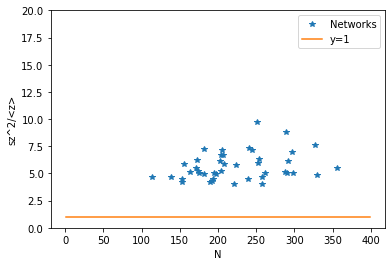

In [76]:
#variability seems to grow with n
y=sz**2/z
x=np.arange(400)
plt.ylim(0,20)
plt.plot(N,y,"*",label="Networks")
plt.plot(x,x/x,label="y=1")
plt.legend()
plt.xlabel("N")
plt.ylabel("sz^2/<z>")
plt.show()